# Intepretation

In [26]:
import classifiers as clf

import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

from config import plotly_id, plotly_key
import plotly
import plotly_express as px
import plotly.plotly as py
plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)

### Load Estimators

In [2]:
unbalanced     = pd.read_pickle("../Data/unbalanced.pkl")
balanced_smote = pd.read_pickle("../Data/balanced_smote.pkl")
balanced_under = pd.read_pickle("../Data/balanced_under.pkl")
y_labels       = pd.read_pickle("../Data/y_labels.pkl")

In [3]:
# all models
all_models = pd.concat([unbalanced, balanced_smote, balanced_under], ignore_index=True)
all_models.sort_values(by=['F1 Score','Accuracy'], ascending=False).head()

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Fit Time,Score Time,Total Time,Confusion Matrix
800,Near Miss Undersampled,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 100}",Train,0.606303,0.616377,0.606303,0.602706,0.552172,0.130602,0.682774,NaN
311,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200, 'n_...",Train,0.602660,0.630807,0.602660,0.598817,0.585003,14.350573,14.935576,NaN
303,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200, '...",Train,0.602516,0.630764,0.602516,0.598683,0.708225,37.368858,38.077082,NaN
803,Near Miss Undersampled,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 100}",Train,0.600962,0.605013,0.600962,0.598317,0.526091,0.110950,0.637040,NaN
801,Near Miss Undersampled,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 200}",Train,0.600962,0.605690,0.600962,0.598112,1.150376,0.223982,1.374358,NaN


In [4]:
all_models.describe()

,Accuracy,Precision,Recall,F1 Score,Fit Time,Score Time,Total Time
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,0.580697,0.404687,0.441332,0.390494,0.585395,0.743849,1.329243
std,0.151780,0.163663,0.095458,0.129835,1.470228,3.716858,4.057035
min,0.326872,0.111111,0.317842,0.166667,0.001506,0.004182,0.006164
25%,0.462763,0.254930,0.333333,0.288907,0.020992,0.041665,0.063741
50%,0.566774,0.397982,0.428599,0.375072,0.113281,0.101556,0.248284
75%,0.764790,0.571134,0.545406,0.538851,0.636897,0.305285,1.059125
max,0.789688,0.632455,0.606303,0.602706,16.476759,37.368858,38.077082


In [5]:
# best estimators of test sets
best_estimators = pd.concat([
    unbalanced[    unbalanced[    'Split'] == 'Test'],
    balanced_smote[balanced_smote['Split'] == 'Test'],
    balanced_under[balanced_under['Split'] == 'Test']],
    ignore_index=True)

# best_estimators
best_estimators.sort_values(by=['F1 Score','Accuracy'], ascending=False).head()

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Fit Time,Score Time,Total Time,Confusion Matrix
8,SMOTE Oversampled,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.656828,0.482631,0.531404,0.486972,8.913941,0.110586,9.024527,"[[1251, 268, 214], [73, 67, 24], [124, 76, 173]]"
11,SMOTE Oversampled,Decision Tree,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",Test,0.616300,0.499489,0.537013,0.476402,0.070661,0.086502,0.157163,"[[1155, 429, 149], [65, 85, 14], [113, 101, 159]]"
10,SMOTE Oversampled,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200, 'n_...",Test,0.676211,0.439771,0.471266,0.448231,0.585003,14.350573,14.935576,"[[1310, 108, 315], [108, 16, 40], [139, 25, 209]]"
13,SMOTE Oversampled,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 300}",Test,0.564317,0.454220,0.514323,0.441183,15.048985,1.149184,16.198169,"[[1024, 427, 282], [66, 77, 21], [99, 94, 180]]"
12,SMOTE Oversampled,Random Forest,"{'max_depth': 4, 'max_features': 10, 'min_impu...",Test,0.560352,0.461558,0.513377,0.440672,2.174344,0.564954,2.739298,"[[1022, 476, 235], [65, 82, 17], [100, 105, 168]]"


In [6]:
best_estimators.describe()

,Accuracy,Precision,Recall,F1 Score,Fit Time,Score Time,Total Time
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.594630,0.446624,0.440810,0.390089,1.567682,0.929951,2.497633
std,0.154423,0.074415,0.068866,0.061710,3.738866,3.109248,4.861475
min,0.326872,0.254479,0.330364,0.263198,0.001506,0.004657,0.006164
25%,0.464758,0.434642,0.384701,0.365092,0.012275,0.041183,0.063472
50%,0.616300,0.461558,0.469457,0.396789,0.070661,0.086502,0.157163
75%,0.763436,0.484357,0.496560,0.438021,0.552172,0.160983,2.000779
max,0.784141,0.562599,0.537013,0.486972,15.048985,14.350573,16.198169


### Quality Metrics

In [7]:
# plot accuracy
accuracy = best_estimators.pivot(index='Classifier',columns='Data',values='Accuracy')
accuracy = accuracy[['Unbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
accuracy

Data,Unbalanced,SMOTE Oversampled,Near Miss Undersampled
Classifier,,,
Ada Boost,0.784141,0.564317,0.420705
Decision Tree,0.781498,0.616300,0.492952
Dummy,0.619824,0.349339,0.326872
K Nearest Neighbors,0.782379,0.676211,0.381498
Logistic Regression,0.781498,0.656828,0.464758
Multinomial Naive Bayes,0.781498,0.666520,0.552423
Random Forest,0.763436,0.560352,0.463877


In [8]:
# plot F1 scores
f1_scores = best_estimators.pivot(index='Classifier',columns='Data',values='F1 Score')
f1_scores = f1_scores[['Unbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
f1_scores

Data,Unbalanced,SMOTE Oversampled,Near Miss Undersampled
Classifier,,,
Ada Boost,0.405544,0.441183,0.365092
Decision Tree,0.380599,0.476402,0.415181
Dummy,0.337210,0.282121,0.263198
K Nearest Neighbors,0.417610,0.448231,0.341169
Logistic Regression,0.380599,0.486972,0.396789
Multinomial Naive Bayes,0.380599,0.437191,0.438021
Random Forest,0.288617,0.440672,0.368877


(0, 1)

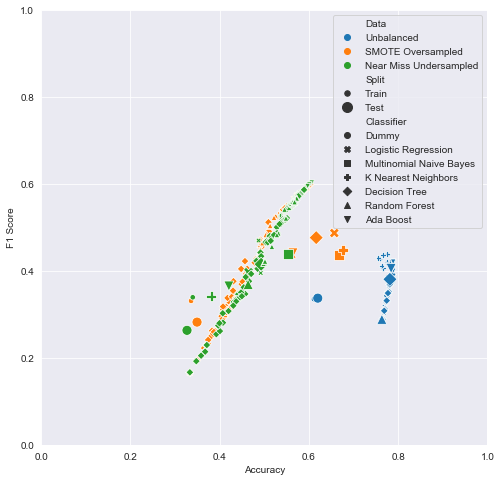

In [9]:
# pareto chart of classifier performance metrics
fig, az = plt.subplots(figsize=(8,8))
sns.scatterplot(x="Accuracy",
                y="F1 Score",
                hue='Data',
                style='Classifier',
                size='Split',
                sizes=[30,100],
                data=all_models)
az.set_xlim(0,1)
az.set_ylim(0,1)

In [15]:
# define hover text function for each trace
def px_hover_text(df):
    hover_text  = []
    
    for index, row in df.iterrows():
        formatted_params = ''.join('{}: {}<br>'.format(k.title(),v) for k,v in row['Parameters'].items())
        hover_text.append(
            ('Data: {balance}<br>'+
             'Split: {split}<br><br>'+
             'Classifier: {classifier}<br>'+
             '{params}<br>'+
             'Accuracy: {accuracy}<br>'+
             'Precision: {precision}<br>'+
             'Recall: {recall}<br>'+
             'F1 Score: {f1_score}<br><br>'+
             'Fit Time: {fit_time}<br>'+
             'Score Time: {score_time}<br>'+
             'Total Time: {total_time}<br>').format(
                balance=row['Data'],
                classifier=row['Classifier'],
                split=row['Split'],
                params=formatted_params,
                accuracy="{:.2%}".format(row['Accuracy']),
                precision="{:.2%}".format(row['Precision']),
                recall="{:.2%}".format(row['Recall']),
                f1_score="{:.2%}".format(row['F1 Score']),
                fit_time="{:.4f} s".format(row['Fit Time']),
                score_time="{:.4f} s".format(row['Score Time']),
                total_time="{:.4f} s".format(row['Total Time'])))
        
    return hover_text

In [32]:
fig = px.scatter(all_models,
                 x='Accuracy',
                 y='F1 Score',
                 color='Data',
                 symbol='Classifier',
                 hover_name='Split')
py.iplot(fig, filename='endangered-species-quality')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Confusion Matrix

In [ ]:
# plot confusion matrices
confusion_matrices = best_estimators.pivot(index='Classifier',columns='Data',values='Confusion Matrix')
confusion_matrices = confusion_matrices[['Unbalanced', 'SMOTE Oversampled', 'Near Miss Undersampled']]
cm, axes = clf.plot_confusion_matrices(confusion_matrices, list(y_labels[0]))

### Efficiency Metrics

In [ ]:
# pareto chart of classifier performance metrics
fig, az = plt.subplots(figsize=(8,8))
sns.scatterplot(x="Fit Time",
                y="Score Time",
                hue='Data',
                style='Classifier',
                data=all_models)
az.set_xlim(0,20)
az.set_ylim(0,40)

### Quality and Efficiency Trade-Off

In [ ]:
# pareto chart of classifier performance metrics
fig, az = plt.subplots(figsize=(8,8))
sns.scatterplot(x="Total Time", y="F1 Score", hue='Data', style='Classifier', data=all_models)
az.set_xlim(0,40)
az.set_ylim(0,1)

### Feature Importance

In [ ]:
grid_searches[0]['Classifier'].best_estimator_.coef_[0]

In [ ]:
best_log_params = list(zip(X.columns, grid_searches[0]['Classifier'].best_estimator_.coef_[0]))
best_log_params.sort(key = lambda x: abs(x[1]), reverse=True)
best_log_params

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in best_log_params]

feature_weights = [abs(i[1]) for i in best_log_params]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)

# Show plot
plt.show()